In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
res_data = pd.read_csv('restaurant_customer_satisfaction.csv')

In [3]:
res_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [4]:
res_data.head()


,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [5]:
res_data.describe(include='all')


,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500,1500.000000,1500,1500.000000,1500,1500,1500.000000,1500,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
unique,NaN,NaN,2,NaN,4,NaN,5,3,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,Weekly,NaN,Italian,Breakfast,NaN,Celebration,Dine-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,759,NaN,606,NaN,325,506,NaN,519,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1403.500000,43.832000,NaN,85921.890000,NaN,105.659004,NaN,NaN,5.035333,NaN,NaN,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,NaN,38183.051749,NaN,52.381849,NaN,NaN,2.558864,NaN,NaN,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,NaN,20012.000000,NaN,10.306127,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,NaN,52444.000000,NaN,62.287907,NaN,NaN,3.000000,NaN,NaN,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,NaN,85811.000000,NaN,104.626408,NaN,NaN,5.000000,NaN,NaN,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,NaN,119159.250000,NaN,148.649330,NaN,NaN,7.000000,NaN,NaN,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000


In [6]:
res_data.nunique()


CustomerID              1500
Age                       52
Gender                     2
Income                  1486
VisitFrequency             4
AverageSpend            1500
PreferredCuisine           5
TimeOfVisit                3
GroupSize                  9
DiningOccasion             3
MealType                   2
OnlineReservation          2
DeliveryOrder              2
LoyaltyProgramMember       2
WaitTime                1500
ServiceRating              5
FoodRating                 5
AmbianceRating             5
HighSatisfaction           2
dtype: int64

In [7]:
res_data.isnull().sum()


CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [8]:
res_eda = res_data.copy()


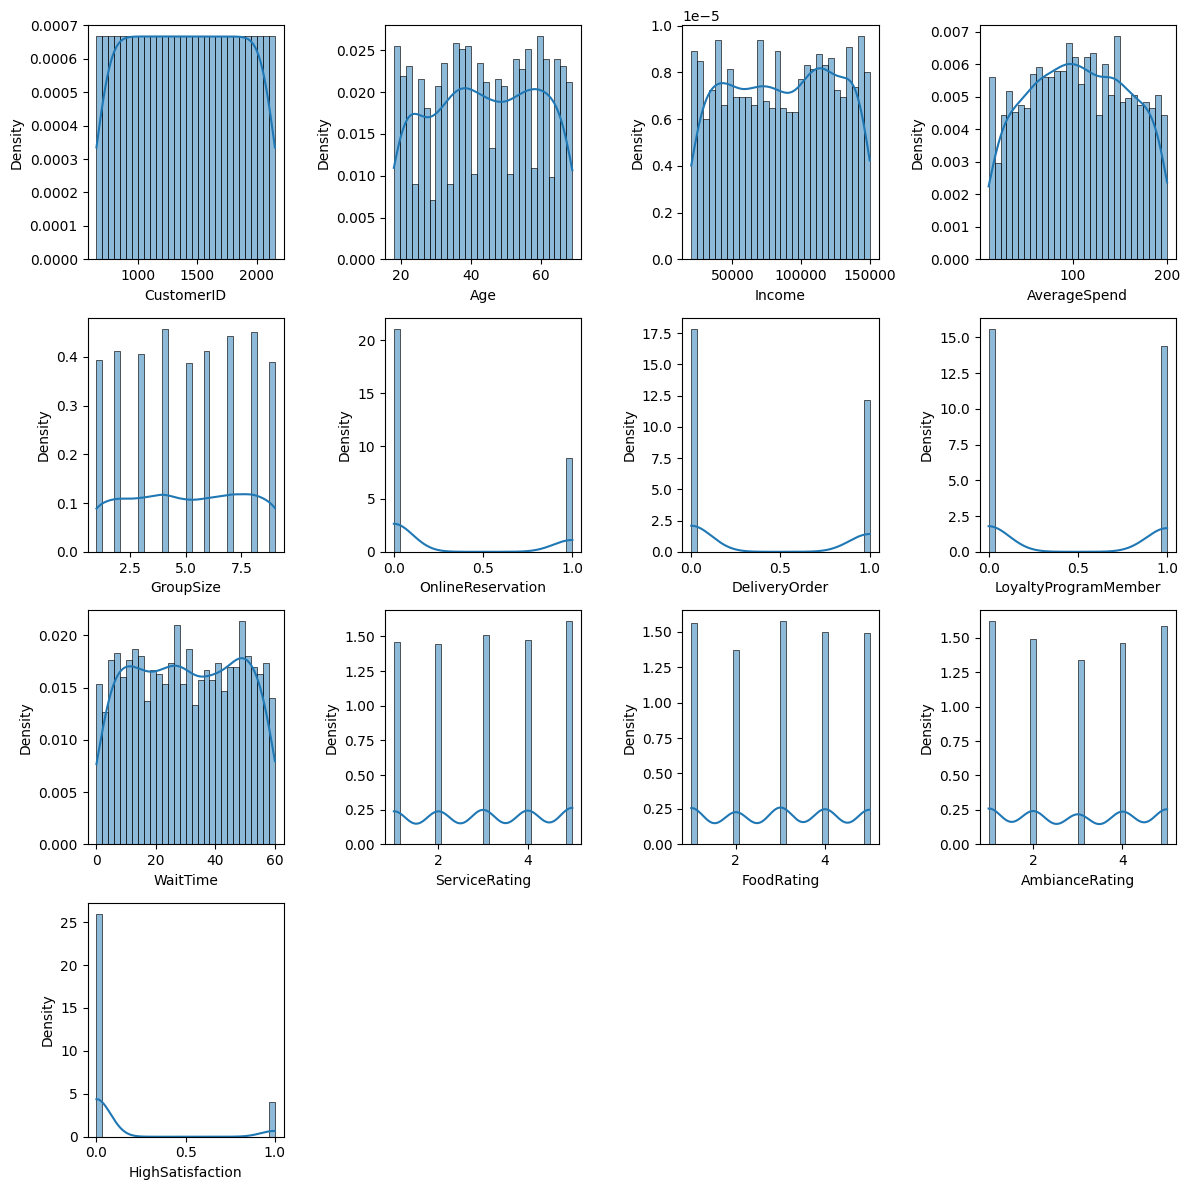

In [9]:
num_cols_eda = num_cols_eda = [n for n in res_eda.columns if res_eda[n].dtypes!='O']

fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(res_eda[col],kde=True,stat='density',bins=30,ax=ax[i])
    
for i in range(len(num_cols_eda),16):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

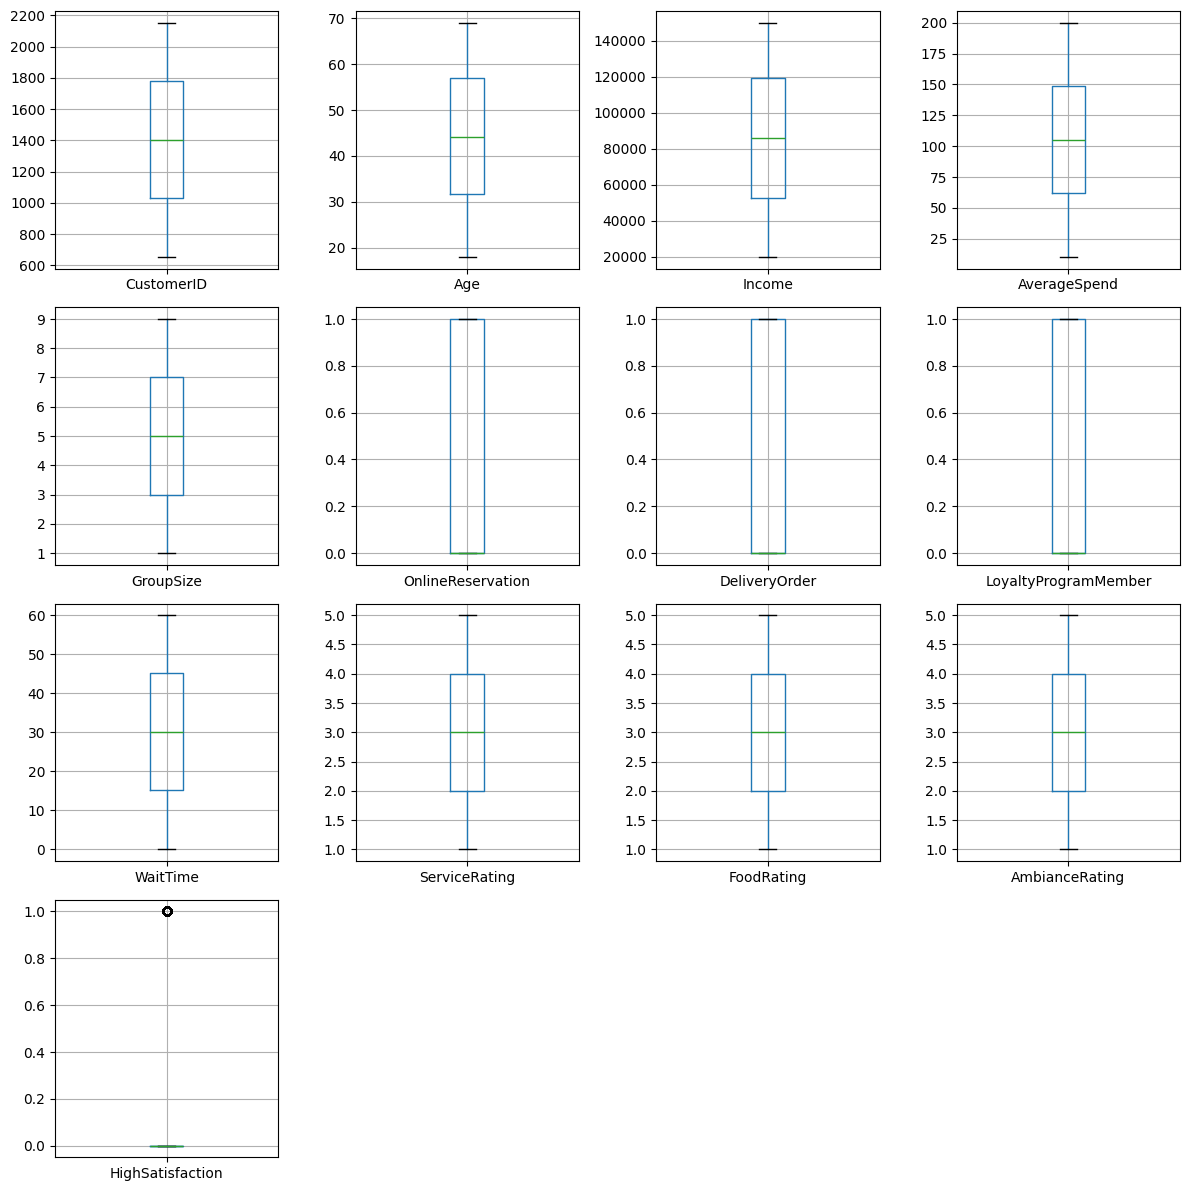

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    res_eda.boxplot(col, ax=ax[i])

for i in range(len(num_cols_eda),16):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

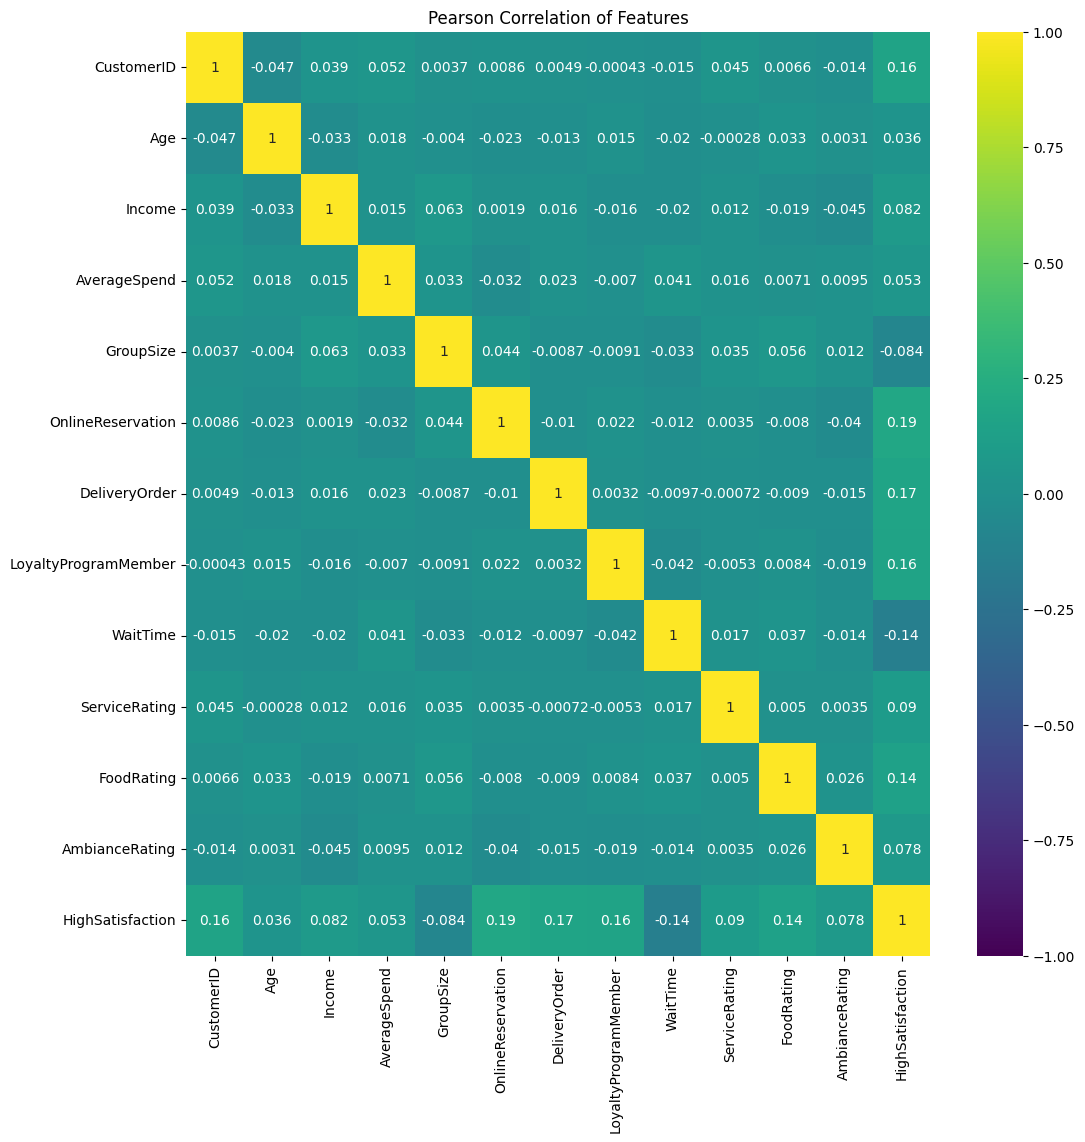

In [11]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(res_eda[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [12]:
cat_cols_eda = [c for c in res_eda.columns if res_eda[c].dtypes=='O']


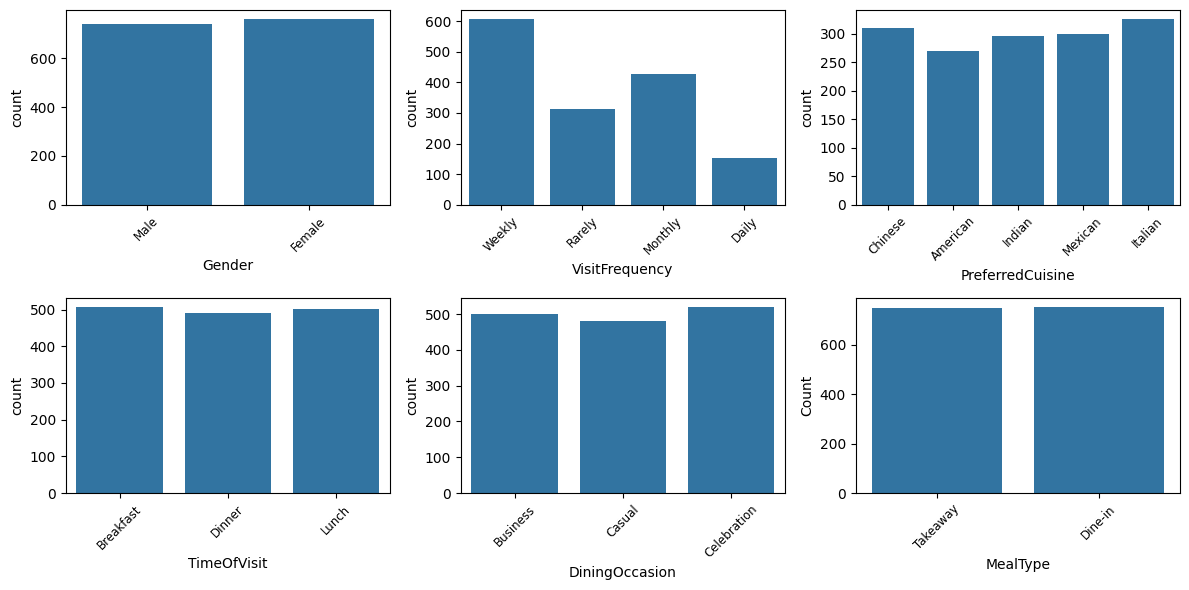

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(cat_cols_eda):
    sns.countplot(x=col, data=res_eda, ax=ax[i])
    plt.ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8.5)

plt.tight_layout()
plt.show()

In [14]:
res_data = res_data.drop(columns=['CustomerID','HighSatisfaction'])


In [15]:
vf_mapping = {'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}

res_data['VisitFrequency'] = res_data['VisitFrequency'].map(vf_mapping)

In [16]:
binary_columns = ['MealType', 'Gender']
binary_mapping = {'Takeaway': 0, 'Dine-in': 1, 'Male': 0, 'Female': 1}
for col in binary_columns:
    res_data[col] = res_data[col].map(binary_mapping)

In [17]:
res_data['Score'] = res_data['ServiceRating'] + res_data['FoodRating'] + res_data['AmbianceRating']
res_data['High Satisfaction'] = res_data['Score'] >= 13
res_data['High Satisfaction'] = res_data['High Satisfaction'].astype(int)

In [18]:
res_data = res_data.drop(columns=['ServiceRating','FoodRating','AmbianceRating','Score'])


In [19]:
res_data.head()


,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,High Satisfaction
0,35,0,83380,3,27.829142,Chinese,Breakfast,3,Business,0,0,1,1,43.523929,0
1,19,0,43623,1,115.408622,American,Dinner,1,Casual,1,0,0,0,57.524294,1
2,41,1,83737,3,106.693771,American,Dinner,6,Celebration,1,0,1,0,48.682623,0
3,43,0,96768,1,43.508508,Indian,Lunch,1,Celebration,1,0,0,0,7.552993,0
4,55,1,67937,2,148.084627,Chinese,Breakfast,1,Business,0,0,0,1,37.789041,0


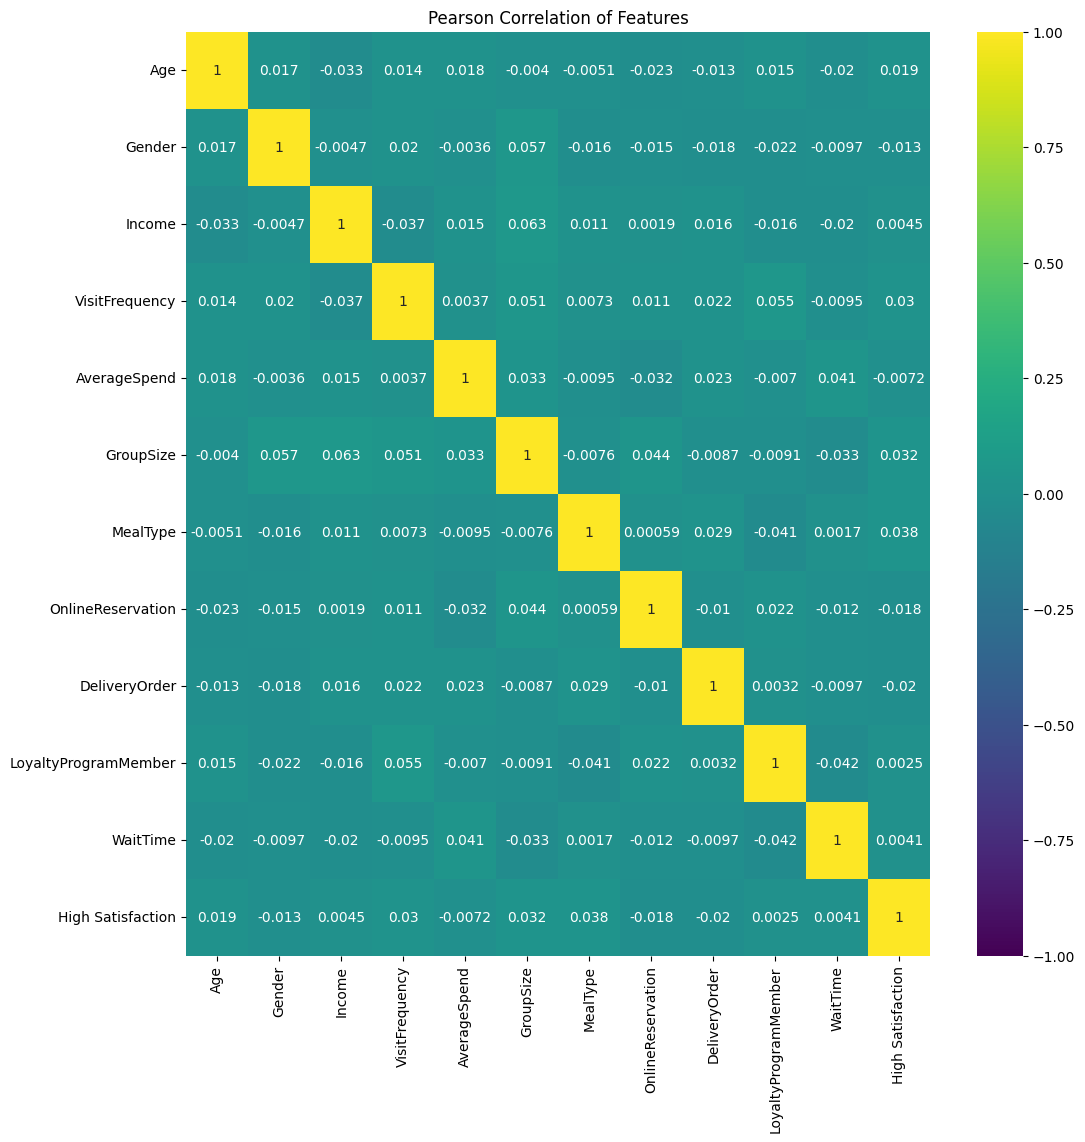

In [20]:
num_cols = [n for n in res_data.columns if res_data[n].dtypes!='O']
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(res_data[num_cols].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    res_data.drop('High Satisfaction', axis=1), res_data['High Satisfaction'], test_size=0.2, random_state=69,stratify=res_data['High Satisfaction'])

X_train.shape, X_test.shape

((1200, 14), (300, 14))

In [22]:
y_train.shape, y_test.shape


((1200,), (300,))

In [23]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['TimeOfVisit','DiningOccasion','PreferredCuisine'], 
    drop_last=False)
ohe_enc.fit(X_train)

OneHotEncoder(variables=['TimeOfVisit', 'DiningOccasion', 'PreferredCuisine'])

In [24]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

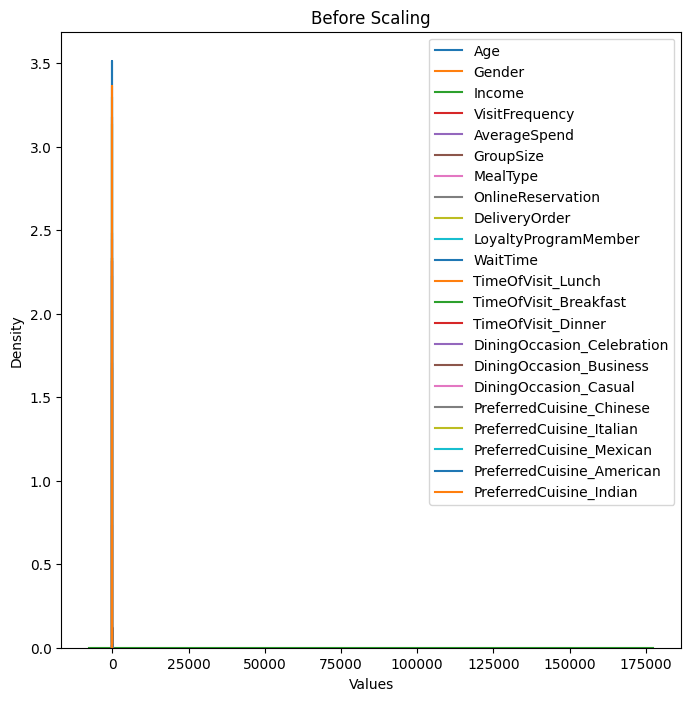

In [25]:
plt.figure(figsize=(8, 8))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [26]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

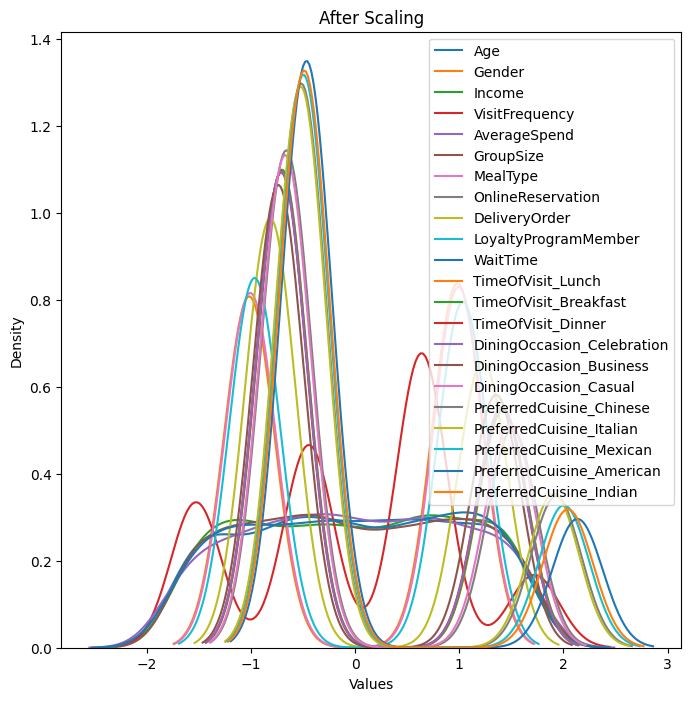

In [27]:
plt.figure(figsize=(8, 8))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [28]:
log_reg = LogisticRegression(random_state=69)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

Logistic Regression Accuracy: 0.9166666666666666
ROC AUC Score: 0.4736


In [29]:
rf_clf = RandomForestClassifier(random_state=69)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

Random Forest Classifier Accuracy: 0.9166666666666666
ROC AUC Score: 0.5133090909090909


In [30]:
adb = AdaBoostClassifier(random_state=69)
adb.fit(X_train, y_train)

y_pred_adb = adb.predict(X_test)

print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adb))
print("ROC AUC Score:", roc_auc_score(y_test, adb.predict_proba(X_test)[:, 1]))

AdaBoost Classifier Accuracy: 0.9
ROC AUC Score: 0.5374545454545455
